In [1]:
import nltk
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Téléchargement des ressources NLTK nécessaires
nltk.download('punkt')
nltk.download('stopwords')

# Données
data = {
    'Review': [
        'At McDonald\'s the food was ok and the service was bad.',
        'I would not recommend this Japanese restaurant to anyone.',
        'I loved this restaurant when I traveled to Thailand last summer.',
        'The menu of Loving has a wide variety of options.',
        'The staff was friendly and helpful at Google\'s employees restaurant.',
        'The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.',
        'I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.',
        'The sushi at Sushi Express is always fresh and flavorful.',
        'The steakhouse on Main Street has a cozy atmosphere and excellent steaks.',
        'The dessert selection at Sweet Treats is to die for!'
    ]
}

df = pd.DataFrame(data)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ludovicveltz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ludovicveltz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 mots les plus fréquents :
          word  frequency
34  restaurant          3
32       pizza          2
43       sushi          2
36     service          2
0      amazing          1
38       staff          1
28        menu          1
29          ok          1
30     options          1
31       pasta          1


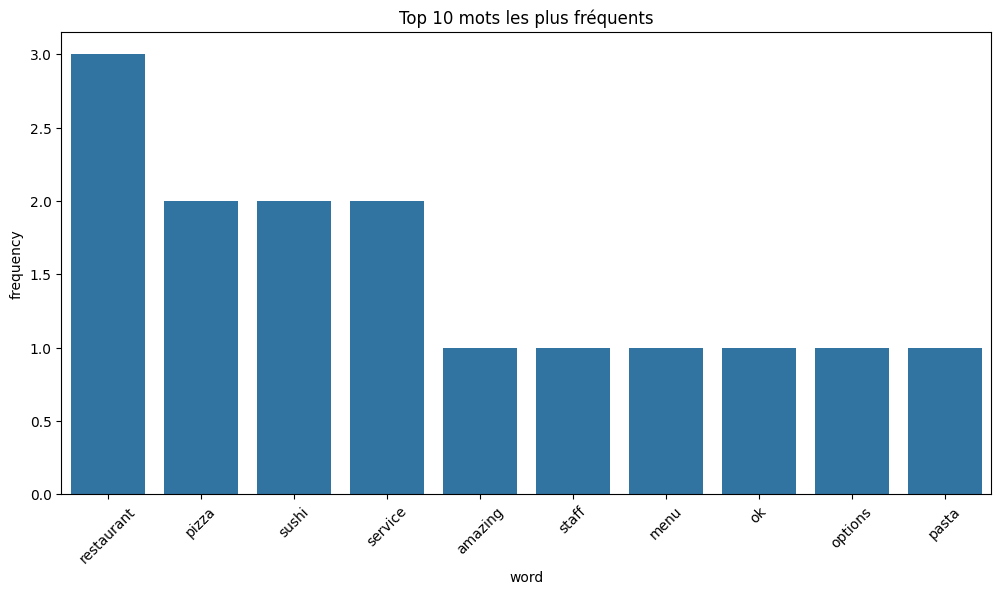

In [2]:
# 1. Création du BoW
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Review'])

# Obtenir les mots et leurs fréquences
words = vectorizer.get_feature_names_out()
word_freq = X.toarray().sum(axis=0)

# Créer un DataFrame des fréquences de mots
word_freq_df = pd.DataFrame({'word': words, 'frequency': word_freq})
word_freq_df = word_freq_df.sort_values('frequency', ascending=False)

print("Top 10 mots les plus fréquents :")
print(word_freq_df.head(10))

# Visualisation des mots les plus fréquents
plt.figure(figsize=(12, 6))
sns.barplot(data=word_freq_df.head(10), x='word', y='frequency')
plt.xticks(rotation=45)
plt.title('Top 10 mots les plus fréquents')
plt.show()


Top 10 mots selon TF-IDF :
          word  tfidf_score
34  restaurant     1.129608
43       sushi     0.755929
36     service     0.663806
32       pizza     0.641413
33   recommend     0.625840
23    japanese     0.625840
42      summer     0.468646
24       loved     0.468646
46    thailand     0.468646
47    traveled     0.468646


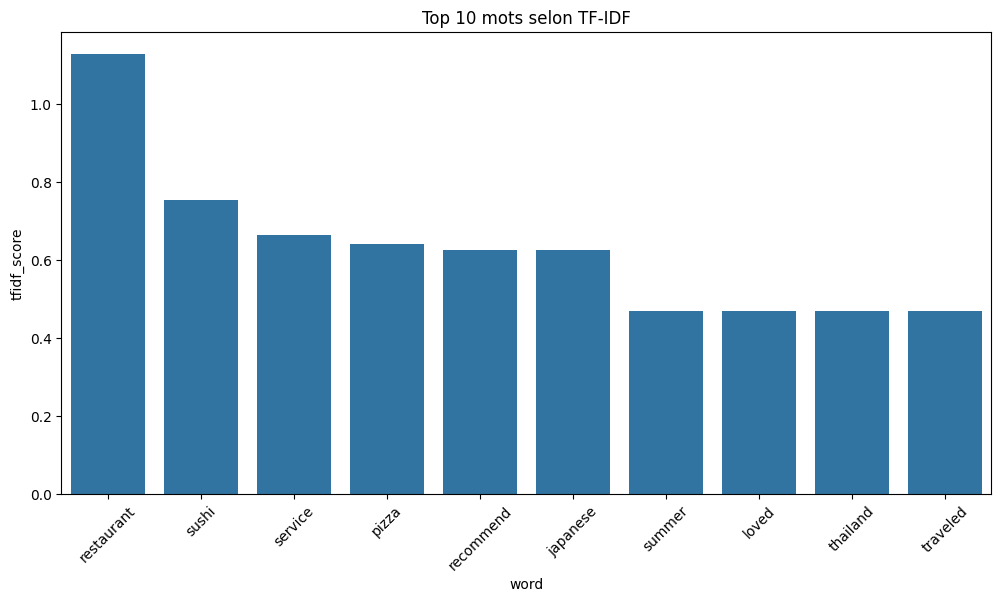

In [3]:
# 2. TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(df['Review'])

# Obtenir les scores TF-IDF
words_tfidf = tfidf.get_feature_names_out()
tfidf_scores = X_tfidf.toarray().sum(axis=0)

# Créer un DataFrame des scores TF-IDF
tfidf_df = pd.DataFrame({'word': words_tfidf, 'tfidf_score': tfidf_scores})
tfidf_df = tfidf_df.sort_values('tfidf_score', ascending=False)

print("\nTop 10 mots selon TF-IDF :")
print(tfidf_df.head(10))

# Visualisation des scores TF-IDF
plt.figure(figsize=(12, 6))
sns.barplot(data=tfidf_df.head(10), x='word', y='tfidf_score')
plt.xticks(rotation=45)
plt.title('Top 10 mots selon TF-IDF')
plt.show()

In [4]:
# 3. Analyse comparative
print("\nAnalyse comparative :")
print("BoW vs TF-IDF :")
print("\nMots communs aux deux top 10 :")
common_words = set(word_freq_df.head(10)['word']) & set(tfidf_df.head(10)['word'])
print(common_words)

print("\nMots uniques à TF-IDF :")
tfidf_unique = set(tfidf_df.head(10)['word']) - set(word_freq_df.head(10)['word'])
print(tfidf_unique)


Analyse comparative :
BoW vs TF-IDF :

Mots communs aux deux top 10 :
{'restaurant', 'pizza', 'sushi', 'service'}

Mots uniques à TF-IDF :
{'recommend', 'traveled', 'summer', 'thailand', 'loved', 'japanese'}


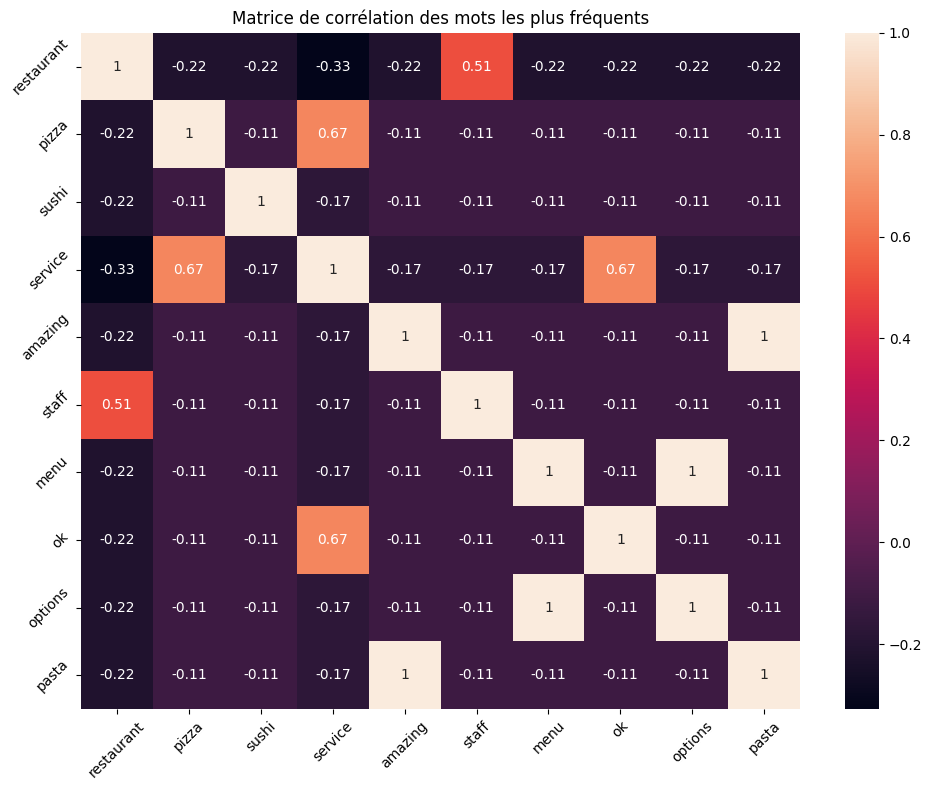

: 

In [ ]:
# 4. Matrice de corrélation des mots
# Prendre les 10 mots les plus fréquents
top_words = word_freq_df.head(10)['word'].tolist()
bow_matrix = X.toarray()[:, [list(words).index(word) for word in top_words]]

correlation_matrix = np.corrcoef(bow_matrix.T)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, xticklabels=top_words, yticklabels=top_words)
plt.title('Matrice de corrélation des mots les plus fréquents')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()